# Quantifying a Summer at Tulip

#### Final Intern Presentation - Jonah Spear

This summer has been one of the periods of most intense learning of my life!
I've often wondered how I can explain to people how much I've learned while working at Tulip. Maybe numbers will help?

## Google Searches

In [2]:
import json

raw_data = []

with open('search_hist_july_to_sept.json') as json_data:
    raw_data += json.load(json_data)['event']
    
with open('search_hist_april_to_june.json') as json_data:
    raw_data += json.load(json_data)['event']
    
query_timestamps = []

from datetime import datetime, timedelta 
epoch = datetime(1970, 1, 1)
tulip_start_date = datetime(year=2017, month=5, day=22)
    
for search_query in raw_data:
    search_timestamp_usec = int(search_query['query']['id'][0]['timestamp_usec'])
    # Convert from UTC microseconds since epoch to Eastern Time.
    search_datetime = search_datetime = epoch + timedelta(microseconds=search_timestamp_usec, hours=-4)
    if search_datetime > tulip_start_date: query_timestamps.append(search_datetime)
        
print len(query_timestamps), 'Google searches completed since starting at Tulip.'

4169 Google searches completed since starting at Tulip.


92


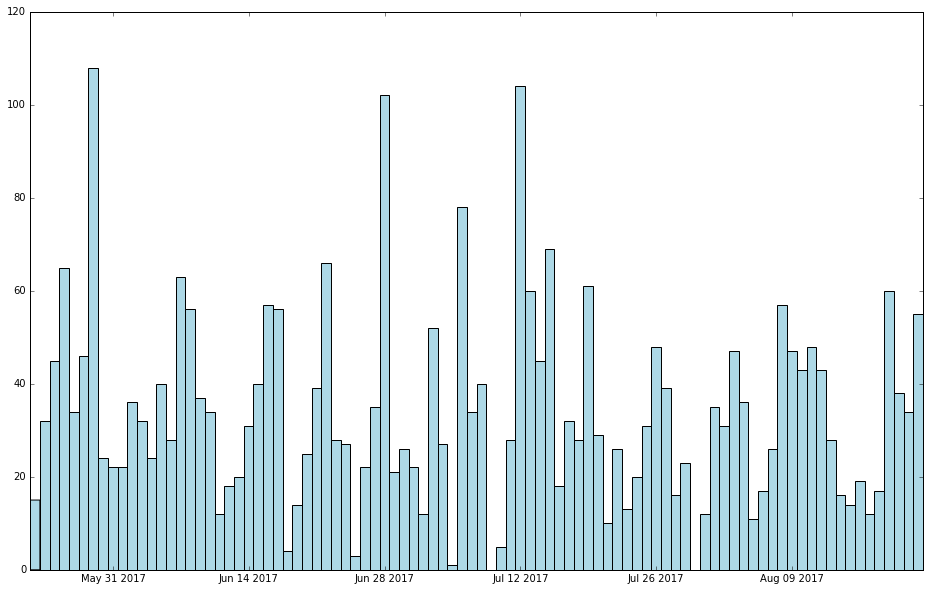

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter only by approximately the time I was at work
working_timestamps = [t for t in query_timestamps if t.hour > 10 and t.hour <= 20]
day_of_year = [t.timetuple().tm_yday for t in working_timestamps]
print max(day_of_year) - min(day_of_year)

# plot it
ax = plt.subplot(111)
ax.hist(working_timestamps, bins=92, color='lightblue')
ax.xaxis_date()
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()

## Most active hours of the day


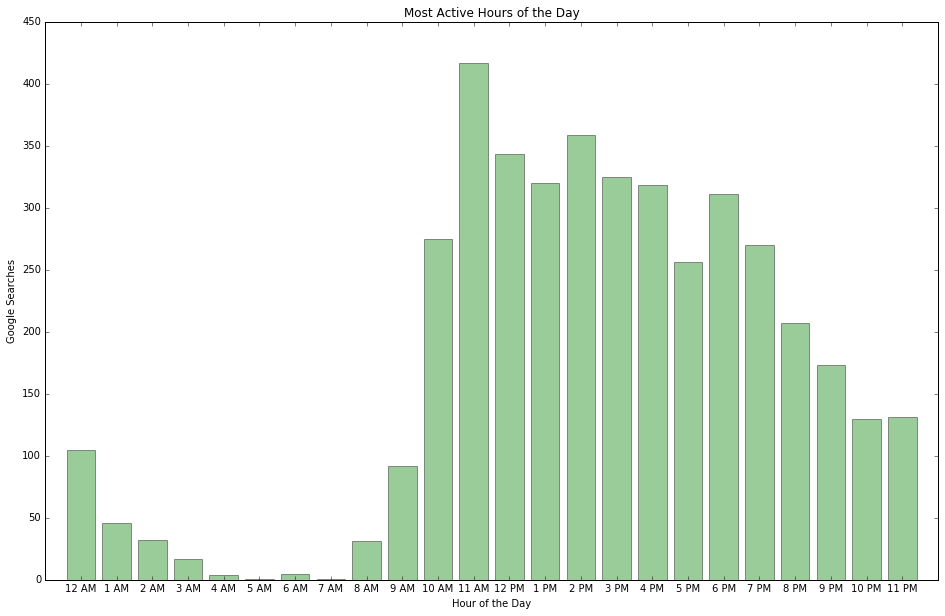

In [4]:
from collections import defaultdict

# Group the dates by hours
hour_frequencies = defaultdict(int)
for d in query_timestamps:
    hour_frequencies[d.hour] += 1
hours = [hour for hour in hour_frequencies]
frequencies = [hour_frequencies[hour] for hour in hours]
hour_labels_AM = ['12 AM'] + [str(h) + ' AM' for h in hours[1:12]]
hour_labels_PM = ['12 PM'] + [str(h % 12) + ' PM' for h in hours[13:]]
hour_labels = hour_labels_AM + hour_labels_PM

# plot it
ax2 = plt.subplot(111)
ax2.bar(hours, frequencies, color='green', align='center', alpha=0.4)
plt.xlabel('Hour of the Day')
plt.ylabel('Google Searches')
plt.title('Most Active Hours of the Day')
plt.xlim([-1, len(hours)])
ax2.set_xticklabels(hour_labels)
ax2.set_xticks(hours)
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.show()